In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from collections import Counter
from library import Library
from course import RelatedStudentExtractor

sns.set(rc={'figure.figsize':(14, 7)})

record_json = 'data/history_2006_2011.json'
item_csv = 'data/item_all_new.csv'
course_data = 'data/course_train_with_dim.json'
crl = RelatedStudentExtractor(course_data)
lib = Library(record_json)

similarity_matrix_shape: torch.Size([15726, 406])
similarity_matrix_shape: torch.Size([15726, 14])


In [2]:
def validate(stuid: str, topn: int, sim_data: str, p=0.5):
    try:
        related_stus_id = crl.get_related_students_id(stuid, topn=topn, sim_data=sim_data, p=p)
    except KeyError:
        return -1
    books_id = set(lib.get_book_id_by_stuid(stuid))
    related_books_id = []
    for stu in related_stus_id:
        try:
            related_books_id.extend(lib.get_book_id_by_stuid(stu))
        except KeyError:
            pass
    related_books_id = set(related_books_id)
    return len(books_id & related_books_id) / len(books_id)

In [3]:
LIB_STU_IDS = lib.stu_id2book.keys()
LIB_STU_IDS = set([s for s in LIB_STU_IDS if s.strip()])
COU_STU_IDS = set(crl.stu_ids)
print(f'numbers of library student id: {len(LIB_STU_IDS)}')
print(f'numbers of course student id: {len(COU_STU_IDS)}')
print(len(COU_STU_IDS & LIB_STU_IDS))

numbers of library student id: 25221
numbers of course student id: 15726
9403


100%|██████████| 25221/25221 [00:26<00:00, 945.58it/s]


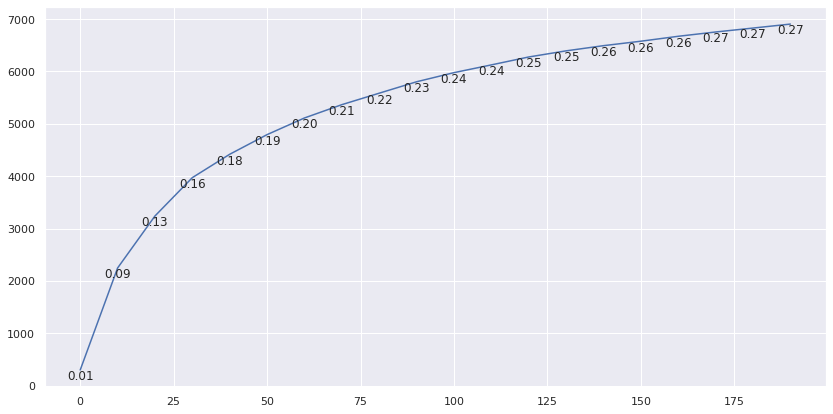

In [4]:
# course category

TOP_NS = range(0, 200, 10)
peo_num = len(LIB_STU_IDS)
dct = {}
for topn in TOP_NS:
    counter = Counter([validate(stuid, topn=topn, sim_data='category', p=1.) for stuid in tqdm(LIB_STU_IDS)])
    del counter[-1]
    del counter[0]
    dct[topn] = sum(counter.values())


ax = sns.lineplot(x=dct.keys(), y=dct.values())
for x, y in zip(list(dct.keys()), list(dct.values())):
    ax.text(x, y,f'{y / peo_num:.2f}', ha="center", va='top')

100%|██████████| 25221/25221 [00:37<00:00, 670.14it/s]


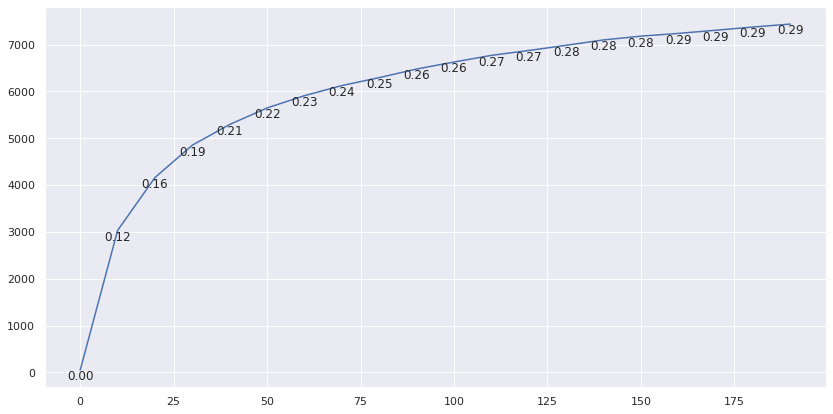

In [5]:
# Course
TOP_NS = range(0, 200, 10)
peo_num = len(LIB_STU_IDS)
dct = {}
for topn in TOP_NS:
    counter = Counter([validate(stuid, topn=topn, sim_data='course') for stuid in tqdm(LIB_STU_IDS)])
    del counter[-1]
    del counter[0]
    dct[topn] = sum(counter.values())


ax = sns.lineplot(x=dct.keys(), y=dct.values())
for x, y in zip(list(dct.keys()), list(dct.values())):
    ax.text(x, y,f'{y / peo_num:.2f}', ha="center", va='top')

100%|██████████| 25221/25221 [00:32<00:00, 784.09it/s]


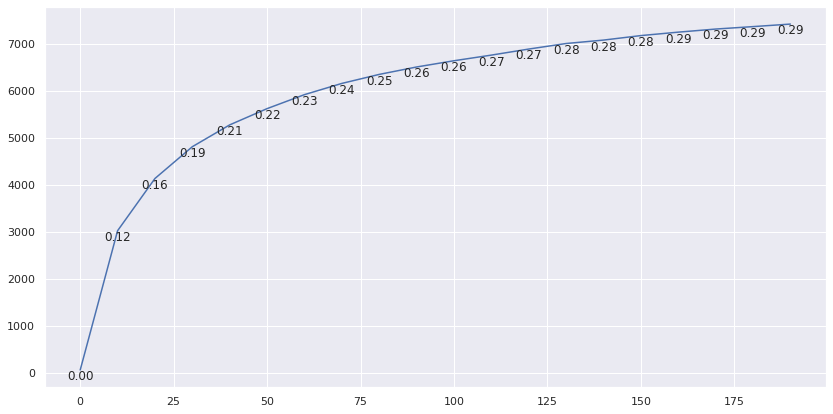

In [6]:
# p=0.5

TOP_NS = range(0, 200, 10)
peo_num = len(LIB_STU_IDS)
dct = {}
for topn in TOP_NS:
    counter = Counter([validate(stuid, topn=topn, sim_data='weight', p=0.5) for stuid in tqdm(LIB_STU_IDS)])
    del counter[-1]
    del counter[0]
    dct[topn] = sum(counter.values())


ax = sns.lineplot(x=dct.keys(), y=dct.values())
for x, y in zip(list(dct.keys()), list(dct.values())):
    ax.text(x, y,f'{y / peo_num:.2f}', ha="center", va='top')